In [1]:
import pandas as pd
import numpy as np
import os
credit_card = pd.read_csv("credit_card.csv", encoding='utf-8')
credit_card.info()
credit_card.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   信用卡顾客编号  65535 non-null  object
 1   申请书来源    65535 non-null  int64 
 2   瑕疵户      65535 non-null  int64 
 3   逾期       65535 non-null  int64 
 4   呆账       65535 non-null  int64 
 5   借款余额     65535 non-null  int64 
 6   退票       65535 non-null  int64 
 7   拒往记录     65535 non-null  int64 
 8   强制停卡记录   65535 non-null  int64 
 9   张数       65535 non-null  int64 
 10  频率       65535 non-null  int64 
 11  户籍       65535 non-null  int64 
 12  都市化程度    65535 non-null  int64 
 13  性別       65535 non-null  int64 
 14  年龄       65535 non-null  int64 
 15  婚姻       65535 non-null  int64 
 16  学历       65535 non-null  int64 
 17  职业       65535 non-null  int64 
 18  个人月收入    65535 non-null  int64 
 19  个人月开销    65535 non-null  int64 
 20  住家       65535 non-null  int64 
 21  家庭月收入    65535 non-null  int64 
 22

,申请书来源,瑕疵户,逾期,呆账,借款余额,退票,拒往记录,强制停卡记录,张数,频率,...,个人月收入,个人月开销,住家,家庭月收入,月刷卡额,宗教信仰,人口数,家庭经济,血型,星座
count,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,...,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000
mean,3.912871,1.945190,1.913680,1.919554,1.906798,1.912596,1.912718,1.907774,1.730190,2.928771,...,3.249470,1.776150,3.148287,2.968185,3.584802,3.763455,4.258289,2.652415,2.615839,6.626246
std,2.041085,0.227612,0.280839,0.271984,0.290718,0.282428,0.282249,0.289346,0.753353,0.843071,...,1.957573,1.023931,1.103219,1.655338,1.578383,2.462894,1.434658,0.986383,1.283497,3.450280
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,4.000000,2.000000,1.000000,4.000000
50%,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,3.000000,1.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,2.000000,7.000000
75%,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,5.000000,2.000000,4.000000,4.000000,5.000000,6.000000,5.000000,3.000000,4.000000,10.000000
max,8.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,5.000000,...,8.000000,5.000000,6.000000,6.000000,8.000000,7.000000,8.000000,5.000000,4.000000,12.000000


In [2]:
index1 = credit_card['逾期'] == 1
index2 = credit_card['呆账'] == 1
index3 = credit_card['强制停卡记录'] == 1
index4 = credit_card['退票'] == 1
index5 = credit_card['拒往记录'] == 1
index6 = credit_card['瑕疵户'] == 2
indexs = index1 & index2 & index3 & index4 & index5 & index6
data1 = credit_card.loc[indexs == False, :] #删除逾期，呆账，强制停卡，退票，拒往记录为1（是），瑕疵户为2（否）后的数据

index7 = data1['拒往记录'] == 2
indexs2 = index2 & index3 & index4 &index7
data2 = data1.loc[indexs2 == False, :]  #删除呆账，强制停卡，退票为1，拒往记录为2后的数据

index8 = data2["频率"] == 5
index9 = data2["月刷卡额"] != 1
indexs3 = index8 & index9
data3 = data2.loc[indexs3 == False, :]  #删除频率为5，刷卡金额不等于1的数据
print("清洗后数据：",data3.head(10))

清洗后数据：         信用卡顾客编号  申请书来源  瑕疵户  逾期  呆账  借款余额  退票  拒往记录  强制停卡记录  张数  ...  个人月收入  \
0   CDMS0000001      5    2   2   2     2   2     2       2   1  ...      1   
1   CDMS0000002      3    2   2   2     2   2     2       2   2  ...      1   
2   CDMS0000003      2    2   2   2     2   2     2       2   2  ...      1   
3   CDMS0000004      3    2   2   2     2   2     2       2   2  ...      1   
4   CDMS0000005      6    2   2   2     2   2     2       2   2  ...      1   
5   CDMS0000006      5    2   2   2     2   2     2       2   2  ...      1   
7   CDMS0000008      6    2   2   2     2   2     2       2   1  ...      1   
8   CDMS0000009      7    2   2   2     2   2     2       2   2  ...      1   
9   CDMS0000010      5    2   2   2     2   2     2       2   2  ...      1   
10  CDMS0000011      1    2   2   2     2   2     2       2   2  ...      1   

    个人月开销  住家  家庭月收入  月刷卡额  宗教信仰  人口数  家庭经济  血型  星座  
0       1   1      1     1     2    4     4   4  10  
1       2   1  

In [4]:
# 2.构造信用卡客户风险关键特征
# (1)历史行为特征；(2)经济风险特征#；（3）收入风险特征；（4）标准化数据

##根据特征瑕疵户，逾期，呆账，强制停卡，退票，拒往记录构建历史行为特征。
card1 = data3[['瑕疵户','逾期','呆账','退票','拒往记录','强制停卡记录']]
#计算评分 数值越低，评分越低
def GetScore(x):
    if x>=2:
        a =0
    else:
        a =1
    return a
score_1=data3['瑕疵户'].apply(GetScore)
score_2=data3['逾期'].apply(GetScore)
score_3=data3['呆账'].apply(GetScore)
score_4=data3['退票'].apply(GetScore)
score_5=data3['拒往记录'].apply(GetScore)
score_6=data3['强制停卡记录'].apply(GetScore)
#加权求和
# data_means.loc[:,'history_credit_risk']=score_1+score_2*2+score_3*3+score_4*3+score_5*3+score_6
print('构建历史行为特征前5个特征为：\n',card1.head())

构建历史行为特征前5个特征为：
    瑕疵户  逾期  呆账  退票  拒往记录  强制停卡记录
0    2   2   2   2     2       2
1    2   2   2   2     2       2
2    2   2   2   2     2       2
3    2   2   2   2     2       2
4    2   2   2   2     2       2


In [5]:
##根据特征借款余额，个人月收入，个人月开销，家庭月收入和月刷卡金额，构建出经济风险情况特征。
card2 = data3[['借款余额','个人月收入','个人月开销','家庭月收入','月刷卡额']]
def GetScore_encomic(x):
    if x >= 2:
        a = 1
    else:
        a = 0
    return a
score_yu = data3['月刷卡额'].apply(GetScore_encomic)
# 个人月收入情况分数
data_person = data3['个人月收入'] / data3['个人月开销']
# 家庭月收入情况分数
data_mouth = data3['家庭月收入'] / data3['月刷卡额']
print('构建经济风险特征前5个特征为：\n',card2.head())

构建经济风险特征前5个特征为：
    借款余额  个人月收入  个人月开销  家庭月收入  月刷卡额
0     2      1      1      1     1
1     2      1      2      1     2
2     2      1      1      1     6
3     2      1      1      1     4
4     2      1      3      1     5


In [6]:
##根据特征职业，年龄，住家，构建出收入风险情况特征。
card3 = data3[['职业','年龄','住家']]
print('构建收入风险情况特征前5个特征为：\n',card3.head())

构建收入风险情况特征前5个特征为：
    职业  年龄  住家
0  12   3   1
1  19   7   1
2  11   2   1
3  12   7   1
4  11   4   1


In [7]:
cards= pd.concat([card1,card2,card3],axis=1)
print('构建特征前5个为：\n',cards.head())

构建特征前5个为：
    瑕疵户  逾期  呆账  退票  拒往记录  强制停卡记录  借款余额  个人月收入  个人月开销  家庭月收入  月刷卡额  职业  年龄  住家
0    2   2   2   2     2       2     2      1      1      1     1  12   3   1
1    2   2   2   2     2       2     2      1      2      1     2  19   7   1
2    2   2   2   2     2       2     2      1      1      1     6  11   2   1
3    2   2   2   2     2       2     2      1      1      1     4  12   7   1
4    2   2   2   2     2       2     2      1      3      1     5  11   4   1


In [8]:
##将瑕疵户 逾期 呆账 退票 拒往记录 强制停卡记录 借款余额 个人月收入 个人月开销 家庭月收入 月刷卡额 职业 年龄 住家 特征标准化
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(cards)
np.savez('D:/cards.npz',data)
print('标准化后模型的前10个特征为：\n',data[:10,:])

标准化后模型的前10个特征为：
 [[ 0.24381325  0.23879532  0.22088026  0.23902695  0.24852776  0.25098948
   0.25335913 -1.15521843 -0.74968558 -1.18316767 -1.6436681  -0.07685176
  -0.44054478 -1.95817546]
 [ 0.24381325  0.23879532  0.22088026  0.23902695  0.24852776  0.25098948
   0.25335913 -1.15521843  0.23116695 -1.18316767 -1.01399949  1.22685193
   1.25542278 -1.95817546]
 [ 0.24381325  0.23879532  0.22088026  0.23902695  0.24852776  0.25098948
   0.25335913 -1.15521843 -0.74968558 -1.18316767  1.50467492 -0.26309514
  -0.86453667 -1.95817546]
 [ 0.24381325  0.23879532  0.22088026  0.23902695  0.24852776  0.25098948
   0.25335913 -1.15521843 -0.74968558 -1.18316767  0.24533771 -0.07685176
   1.25542278 -1.95817546]
 [ 0.24381325  0.23879532  0.22088026  0.23902695  0.24852776  0.25098948
   0.25335913 -1.15521843  1.21201948 -1.18316767  0.87500632 -0.26309514
  -0.01655289 -1.95817546]
 [ 0.24381325  0.23879532  0.22088026  0.23902695  0.24852776  0.25098948
   0.25335913 -1.15521843  0.23116

In [9]:
##构建K-Means聚类模型
##构建聚类模型，聚类数为5，训练模型，并求出聚类中心，每类的用户数目

from sklearn.cluster import KMeans
data_kmeans = KMeans(n_clusters=5,random_state=123).fit(cards)
print('聚类中心：',data_kmeans.cluster_centers_)
# 构建KMeans聚类
card_scale = np.load('D:/cards.npz')\
    ['arr_0']
k = 5
kmeans_model = KMeans(n_clusters=k,random_state=123)
fit_kmeans = kmeans_model.fit(card_scale)
kmeans_model.cluster_centers_ #查看聚类中心
#统计不同类别样本的数目
a1 = pd.Series(kmeans_model.labels_).value_counts()
#datas.to_csv("mean.csv",index=False,sep=',', encoding="utf_8_sig")
#a1.to_csv("final_data.csv",index=False,sep=',', encoding="utf_8_sig")
print('最终每个类别的数目为：\n',a1)

聚类中心： [[ 1.9518616   1.94704776  1.96141407  1.94704776  1.95675066  1.94238436
   1.94697255  3.37442648  1.74764949  3.03091388  3.95667544 19.08867995
   4.2708537   3.37111696]
 [ 1.94126905  1.93588469  1.95203777  1.94126905  1.94665341  1.93588469
   1.94126905  2.52659046  1.80864811  2.81196156  2.81196156  3.64927104
   4.16451292  2.71678264]
 [ 1.93152753  1.94307282  1.94884547  1.93703375  1.92024867  1.93152753
   1.92602131  1.43294849  1.73490231  1.80239787  3.63374778 12.41811723
   3.09076377  3.28383659]
 [ 1.95220678  1.96805657  1.96013168  1.96769081  1.93672275  1.95220678
   1.93672275  3.3621068   1.74823214  2.94964643  3.8206535  12.80529139
   7.37722507  3.0510851 ]
 [ 1.94367896  1.94367896  1.94774271  1.94367896  1.94361547  1.94367896
   1.94361547  5.04203441  1.77382691  3.85211759  3.80379707 13.28579592
   2.68664677  3.26433424]]
最终每个类别的数目为：
 0    21829
4    18728
2    12399
3     4158
1     3464
dtype: int64


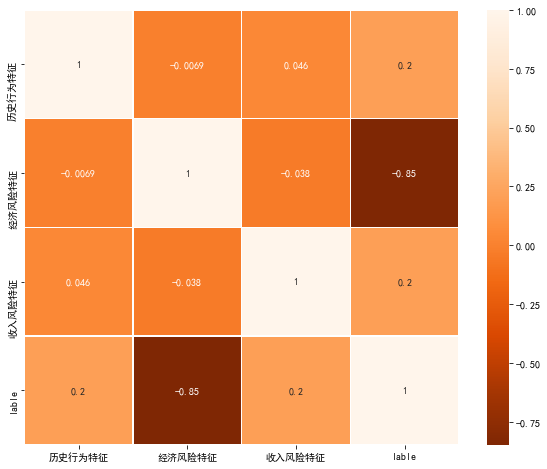

In [10]:
#相关系数
import csv  # 导入csv模块
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] = 'SimHei'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False
# 相关性结果数据表
d= pd.read_csv('mean.-+---+csv', usecols=['历史行为特征','经济风险特征','收入风险特征','lable'])
# print(d)
corrmat=d.corr()
# #热力图
fig=plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, square=True,linewidths=.5, annot=True,cmap='Oranges_r');
plt.show()
#经济风险特征和类别存在高度相关，相关系数为-0.85
#收入风险特征和类别都是低度相关，相关系数为0.2

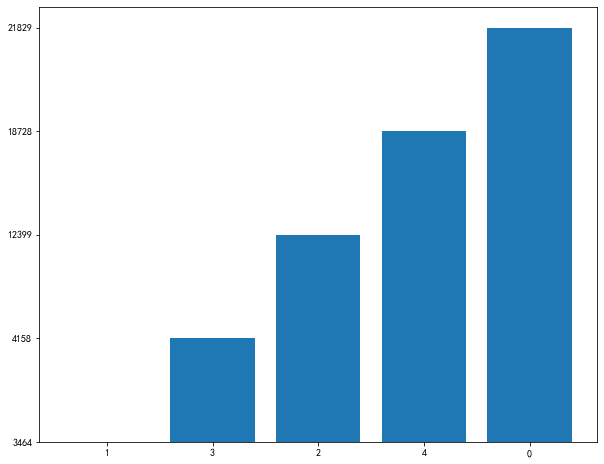

In [11]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

exampleFile = open('final_data.csv')  # 打开csv文件
exampleReader = csv.reader(exampleFile)  # 读取csv文件
exampleData = list(exampleReader)  # csv数据转换为列表
length_zu = len(exampleData)  # 得到数据行数
length_yuan = len(exampleData[0])  # 得到每行长度

x = list()
y = list()

for i in range(1, length_zu):  # 从第二行开始读取
    x.append(exampleData[i][0])  # 将第一列数据从第二行读取到最后一行赋给列表x
    y.append(exampleData[i][1])  # 将第二列数据从第二行读取到最后一行赋给列表
fig=plt.figure(figsize=(10, 8))
plt.bar(x, y)  # 绘制x,y的折线图
plt.show()  # 显示柱状图

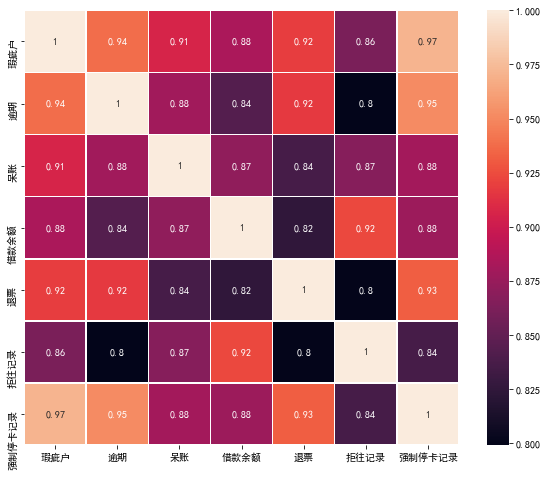

In [12]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'SimHei'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False
#根据特征瑕疵户，逾期，呆账，强制停卡，退票，拒往记录构建历史行为特征相关分析
# 相关性结果数据表
d= pd.read_csv('credit_card完成.csv', usecols=['瑕疵户','逾期','呆账','借款余额','退票','拒往记录','强制停卡记录'])
# print(d)
corrmat=d.corr()
# #热力图
fig=plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, square=True,linewidths=.5, annot=True);
plt.show()

#'瑕疵户'与'强制停卡记录'的相关系数很高,相关系数为0.97
#'逾期'与'强制停卡记录'的相关系数很高,相关系数为0.95
#'瑕疵户'与'逾期'的相关系数很高,相关系数为0.94

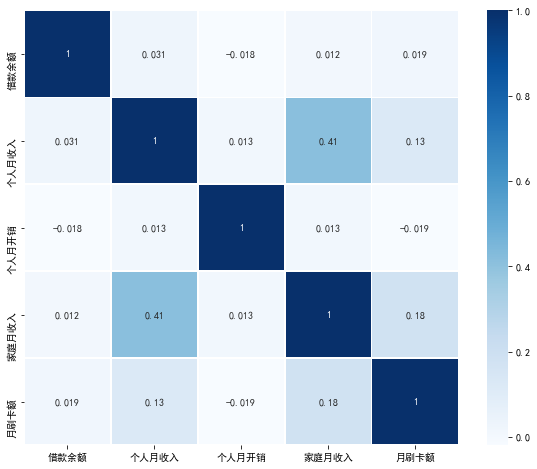

In [13]:
#根据特征借款余额，个人月收入，个人月开销，家庭月收入和月刷卡金额，构建出经济风险情况特征相关分析。
d= pd.read_csv('credit_card完成.csv',usecols=['借款余额','个人月收入','个人月开销','家庭月收入','月刷卡额'])
# print(d)
corrmat=d.corr()
# #热力图
fig=plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, square=True,linewidths=.5, annot=True,cmap='Blues');
plt.show()
#个人月收入和家庭月收入是中度相关，相关系数是0.41

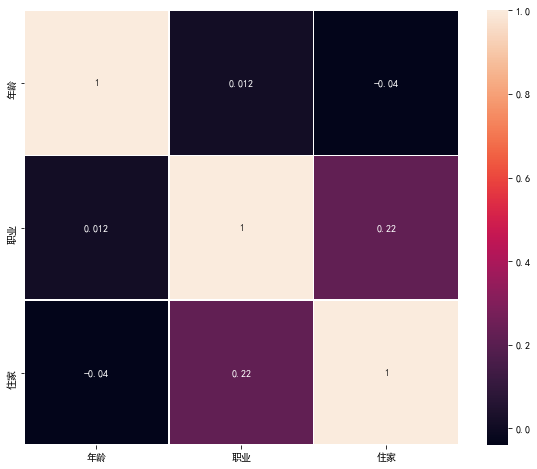

In [14]:
#根据特征职业，年龄，住家，构建出收入风险情况特征相关分析。
d= pd.read_csv('credit_card完成.csv',usecols=['职业','年龄','住家'])
# print(d)
corrmat=d.corr()
# #热力图
fig=plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, square=True,linewidths=.5, annot=True);
plt.show()
#住家和职业是低度相关，相关系数是0.22

In [ ]:
# 手肘法的核心指标是SSE(sum of the squared errors，误差平方和)，

# 当k小于真实聚类数时，由于k的增大会大幅增加每个簇的聚合程度，故SSE的下降幅度会很大，

#而当k到达真实聚类数时，再增加k所得到的聚合程度回报会迅速变小，
#     所以SSE的下降幅度会骤减，然后随着k值的继续增大而趋于平缓，也就是说SSE和k的关系图是一个手肘的形状，
#     而这个  肘部对应的k值就是数据的真实聚类数。当然，这也是该方法被称为手肘法的原因。
# # 对于K-Means方法，k的取值是一个难点，因为是无监督的聚类分析问题，所以不寻在绝对正确的值，需要进行研究试探。
# # 这里采用计算SSE的方法，尝试找到最好的K数值。编写函数如下：

D:\apps\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\apps\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


簇数是 2 时； SSE是 130622.63425588822


D:\apps\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


簇数是 3 时； SSE是 75652.00203849505


D:\apps\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


簇数是 4 时； SSE是 47669.39097379853


D:\apps\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


簇数是 5 时； SSE是 38928.864464711965


D:\apps\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


簇数是 6 时； SSE是 34100.493722513274


D:\apps\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


簇数是 7 时； SSE是 28125.672648622465


D:\apps\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


簇数是 8 时； SSE是 24230.878883232093


D:\apps\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


簇数是 9 时； SSE是 20720.44142859167


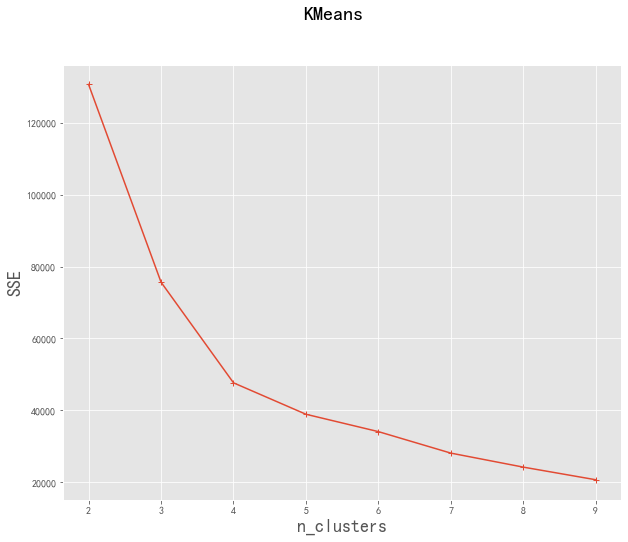

In [16]:
from sklearn.decomposition import PCA
def getFeature(data):
    '''
    将特征数据集合降维为1
    :param data: 需要降维的数据数组
    :return: np.array
    '''
    pca = PCA(n_components=1)
    data = pca.fit_transform(data)
    return data
behaviorFeature = getFeature(card1)
economicRisksFeature = getFeature(card2)
risksFeature = getFeature(card3)

from sklearn.preprocessing import StandardScaler
 # 将三个特征合并
allFeatures = np.append(behaviorFeature, economicRisksFeature, axis=1)
allFeatures = np.append(allFeatures, risksFeature, axis=1)
# 特征工程归一化
sdScaler = StandardScaler()
# # 构建信用卡高风险客户识别模型（HEI）
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
km_model = KMeans(n_clusters=5,n_jobs=4)
x_data = sdScaler.fit_transform(allFeatures)
fit_kmeans = km_model.fit(x_data)
km_model.cluster_centers_

def distEclud(vecA, vecB):
    """
    计算两个向量的欧式距离的平方，并返回
    """
    return np.sum(np.power(vecA - vecB, 2))


def test_Kmeans_nclusters(data_train):
    """
    计算不同的k值时，SSE的大小变化
    """
    data_train = data_train
    nums = range(2, 10)
    SSE = []
    for num in nums:
        sse = 0
        kmodel = KMeans(n_clusters=num, n_jobs=4)
        kmodel.fit(data_train)
        # 簇中心
        cluster_ceter_list = kmodel.cluster_centers_
        # 个样本属于的簇序号列表
        cluster_list = kmodel.labels_.tolist()
        for index in range(len(data_train)):
            cluster_num = cluster_list[index]
            sse += distEclud(data_train[index, :], cluster_ceter_list[cluster_num])
        print("簇数是", num, "时； SSE是", sse)
        SSE.append(sse)
    return nums, SSE


x_data = sdScaler.fit_transform(allFeatures)
nums, SSE = test_Kmeans_nclusters(x_data)

import matplotlib.pyplot as plt
#画图，通过观察SSE与k的取值尝试找出合适的k值
# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['font.size'] = 12.0
plt.rcParams['axes.unicode_minus'] = False
# 使用ggplot的绘图风格
plt.style.use('ggplot')
## 绘图观测SSE与簇个数的关系
fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(1,1,1)
ax.plot(nums,SSE,marker="+")
ax.set_xlabel("n_clusters", fontsize=18)
ax.set_ylabel("SSE", fontsize=18)
fig.suptitle("KMeans", fontsize=20)
plt.savefig('KMeans.png')
plt.show()

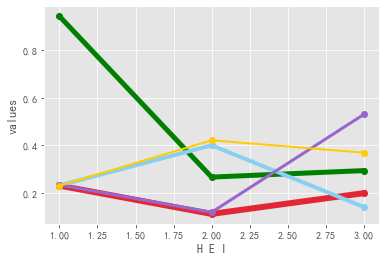

In [17]:
from pandas import Series, DataFrame
# 将三个特征合并
allFeatures = np.append(behaviorFeature, economicRisksFeature, axis=1)
allFeatures = np.append(allFeatures, risksFeature, axis=1)
# 特征工程归一化
sdScaler = StandardScaler()
x_data = sdScaler.fit_transform(allFeatures)
x_data = (x_data-x_data.min())/(x_data.max()-x_data.min())
# print('x_data',x_data)
# 初始化算法构造器，设置聚类数为5
km = KMeans(n_clusters=5)
# 训练数据获取模型
model = km.fit_transform(x_data)
# 持久化模型
# joblib.dump(model, "./model/card_km.model")
# 获取聚类中心点
center = km.cluster_centers_
import matplotlib.pyplot as plt
clu = km.cluster_centers_
# print(clu)
x = [1,2,3]

colors = ['#e32636','#008000','#89cff0','#9966cc','#ffcc00']
for i in range(5):
    plt.plot(x,clu[i],label='clustre '+str(i),linewidth=6-i,color=colors[i],marker='o')
    

plt.xlabel('H E I')
plt.ylabel('values')
plt.show()

In [ ]:
# 我们重点关注的是H，E，I，从HEI图中可以看到：
# 1、一类客户 [绿]   E I 很高，H也不低，可以看做是重要保持客户
# 2、二类客户[黄]   可以看做是重要发展客户
# 3、三类客户[紫]  重要挽留客户，原因：H很高，可以看做是重要的挽留客户，因为历史行为很高， 但是E和I较低
# 4、四类客户[蓝]    E特别高，其余都较低,可以看作是一般客户
# 5、五类客户[红]  低价值客户